In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("auto_fuel.csv" ,names = ['horsepower', 'weight',"cylinders", "displacement","mpg"])

In [3]:
df

,horsepower,weight,cylinders,displacement,mpg
0,69.0,2189.0,4.0,96.0,26.0
1,115.0,2795.0,4.0,121.0,21.6
2,60.0,1800.0,4.0,91.0,36.1
3,70.0,1955.0,4.0,91.0,26.0
4,86.0,2790.0,4.0,140.0,27.0
...,...,...,...,...,...
387,89.0,2755.0,4.0,140.0,25.5
388,88.0,3139.0,6.0,250.0,18.0
389,85.0,3070.0,6.0,200.0,20.8
390,100.0,3288.0,6.0,232.0,18.0


In [4]:
new_row = {'69':69, '2189':2189, '4':4, '96':96, "26":26}

In [5]:
df = df.append(new_row, ignore_index=True)

C:\Users\La_Admin\AppData\Local\Temp\ipykernel_1288\2347932578.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


In [6]:
df.tail() # inserted

,horsepower,weight,cylinders,displacement,mpg,2189,26,4,69,96
388,88.0,3139.0,6.0,250.0,18.0,NaN,NaN,NaN,NaN,NaN
389,85.0,3070.0,6.0,200.0,20.8,NaN,NaN,NaN,NaN,NaN
390,100.0,3288.0,6.0,232.0,18.0,NaN,NaN,NaN,NaN,NaN
391,84.0,2635.0,4.0,151.0,26.6,NaN,NaN,NaN,NaN,NaN
392,NaN,NaN,NaN,NaN,NaN,2189.0,26.0,4.0,69.0,96.0


In [7]:
df # we will have to rename the cols

,horsepower,weight,cylinders,displacement,mpg,2189,26,4,69,96
0,69.0,2189.0,4.0,96.0,26.0,NaN,NaN,NaN,NaN,NaN
1,115.0,2795.0,4.0,121.0,21.6,NaN,NaN,NaN,NaN,NaN
2,60.0,1800.0,4.0,91.0,36.1,NaN,NaN,NaN,NaN,NaN
3,70.0,1955.0,4.0,91.0,26.0,NaN,NaN,NaN,NaN,NaN
4,86.0,2790.0,4.0,140.0,27.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
388,88.0,3139.0,6.0,250.0,18.0,NaN,NaN,NaN,NaN,NaN
389,85.0,3070.0,6.0,200.0,20.8,NaN,NaN,NaN,NaN,NaN
390,100.0,3288.0,6.0,232.0,18.0,NaN,NaN,NaN,NaN,NaN
391,84.0,2635.0,4.0,151.0,26.6,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape 

(393, 10)

In [9]:
df.rename(columns={"69": 'horsepower', "2189": 'weight', "4":"cylinders", "96":"displacement", "26":"mpg"}, inplace=True)

In [10]:
df # renamed!

,horsepower,weight,cylinders,displacement,mpg,weight,mpg,cylinders,horsepower,displacement
0,69.0,2189.0,4.0,96.0,26.0,NaN,NaN,NaN,NaN,NaN
1,115.0,2795.0,4.0,121.0,21.6,NaN,NaN,NaN,NaN,NaN
2,60.0,1800.0,4.0,91.0,36.1,NaN,NaN,NaN,NaN,NaN
3,70.0,1955.0,4.0,91.0,26.0,NaN,NaN,NaN,NaN,NaN
4,86.0,2790.0,4.0,140.0,27.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
388,88.0,3139.0,6.0,250.0,18.0,NaN,NaN,NaN,NaN,NaN
389,85.0,3070.0,6.0,200.0,20.8,NaN,NaN,NaN,NaN,NaN
390,100.0,3288.0,6.0,232.0,18.0,NaN,NaN,NaN,NaN,NaN
391,84.0,2635.0,4.0,151.0,26.6,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape[0] - df.count() # see the possible nulls

horsepower        3
weight            5
cylinders         4
displacement      3
mpg               1
weight          392
mpg             392
cylinders       392
horsepower      392
displacement    392
dtype: int64

In [12]:
np.count_nonzero(df.isnull()) # 11 mis values

1976

In [13]:
df = df.dropna() # since there are few, just drop them

In [14]:
np.count_nonzero(df.isnull()) # count again - 0

0

In [16]:
df.boxplot() # let's the how our variables are disperssed(varieted) around the their median

<AxesSubplot:>

In [17]:
# clearly, weight has much larger values than the others! we should apply scaling method here, with the skelaerns StandardScaler

In [309]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [310]:
X = df.iloc[:, 0:df.shape[1]]

In [311]:
X_t = num_pipeline.fit_transform(X)

In [312]:
new = pd.DataFrame(X_t, columns = ['horsepower','weight',"cylinders","displacement","mpg"]) # and our new data frame

In [313]:
new

,horsepower,weight,cylinders,displacement,mpg
0,0.276787,-0.212121,-0.864482,-0.702832,-0.238372
1,-1.151562,-1.388280,-0.864482,-0.990858,1.625087
2,-0.891862,-1.205059,-0.864482,-0.990858,0.327091
3,-0.476343,-0.218032,-0.864482,-0.520415,0.455606
4,-0.762012,-0.968645,-0.864482,-0.933253,0.584120
...,...,...,...,...,...
378,-0.424403,0.194511,0.311705,0.535681,-0.701024
379,-0.502313,0.112948,0.311705,0.055637,-0.341184
380,-0.112763,0.370639,0.311705,0.362866,-0.701024
381,-0.528282,-0.401252,-0.864482,-0.414805,0.404200


<AxesSubplot:>

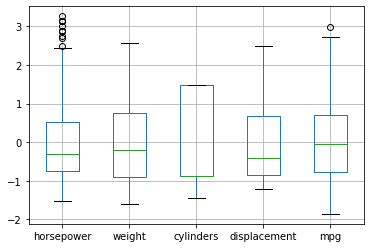

In [314]:
new.boxplot() # but now we see a couple of outliers for horse power - that may affect our regression badly

In [315]:
Q3 = np.quantile(new["horsepower"], 0.75)
Q1 = np.quantile(new["horsepower"], 0.25) 
IQR = Q3 - Q1 # calculate IQR

In [316]:
IQR

1.2855145305692313

In [317]:
lower_range = Q1 - 1.5 * IQR # upper and lower ranges for our values for horsepower - if some value is out of bounds - its outlier
upper_range = Q3 + 1.5 * IQR

In [318]:
outlier_free_list = [x for x in new["horsepower"] if ((x > lower_range) & (x < upper_range))] # get the ones in the bounds

In [319]:
filtered_data = new.loc[new["horsepower"].isin(outlier_free_list)] # update our data

<AxesSubplot:>

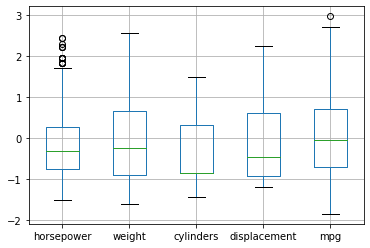

In [320]:
filtered_data.boxplot() # thats better!

In [321]:
filtered_data.corr() # finally, we see that all independent values have a strong negative correlation with mpg
# that means there is a negative linerar relationship between each of our indep variabls and mpg
# thus, our coefficients have some moderate affect on the value of mpg

,horsepower,weight,cylinders,displacement,mpg
horsepower,1.000000,0.873603,0.852872,0.891832,-0.785788
weight,0.873603,1.000000,0.891366,0.936642,-0.823521
cylinders,0.852872,0.891366,1.000000,0.955518,-0.762268
displacement,0.891832,0.936642,0.955518,1.000000,-0.800449
mpg,-0.785788,-0.823521,-0.762268,-0.800449,1.000000


In [322]:
def poly(data,n): # difine the fucn for poly trans and model fit
    poly_features = PolynomialFeatures(degree = n)
    new_x = poly_features.fit_transform(data.iloc[:, 0:data.shape[1]-1]) # except the y value (dependent)
    model =  LinearRegression()
    model.fit(new_x,data["mpg"])
    r = model.score(new_x,data["mpg"]) # R^2 on the traiing set
    print(model.coef_) # see the coefficents
    print()
    return model,new_x,r

In [323]:
X_train, X_test, y_train, y_test = train_test_split(filtered_data, filtered_data["mpg"], test_size=0.2, random_state=42)
# set the training and test sets

In [324]:
for i in range(1,31): # lets try 30 degrees
    res = poly(X_train,i)
    model,trans,r_squared = res[0],res[1],res[2]
    y_hats = model.predict(trans)
    sq_error = mse(y_train,y_hats)
    print(f"R^2: {r_squared},mse: {sq_error}, pol degree: {i}\n") # note that these are the outputs on the training set


[ 0.         -0.31051494 -0.54413621  0.07024539 -0.15435772]

R^2: 0.6937007083192183,mse: 0.3100135245920715, pol degree: 1

[ 0.         -0.55090387 -0.39492835 -0.00436452 -0.19384961 -0.0645263
 -0.00972035  0.44167315 -0.01691245 -0.07708341  0.02236998  0.18806162
  0.41140459 -1.0206451   0.49637507]

R^2: 0.7452604129499282,mse: 0.2578285989535528, pol degree: 2

[ 1.77954752e-15 -3.44179589e-01 -5.50342752e-01 -5.16904781e-01
  6.64600531e-02  2.41965498e-01 -4.35258199e-01  1.20040359e-01
  3.09580043e-01  1.06013841e-01 -7.84816152e-02  2.66254935e-01
  2.32524615e-01 -5.69928734e-01  6.55271671e-02  2.04056039e-01
 -1.62510330e-01  8.97764194e-01 -1.03843216e+00 -2.54802683e-01
 -2.58521261e+00  3.60274579e+00  1.20464398e+00 -1.97660858e+00
 -2.54482135e-01  5.01123157e-01 -5.22072582e-01 -8.41507907e-01
 -7.37660059e-01  4.98085883e+00 -3.22118400e+00  3.70801910e-01
 -8.71635357e-01 -4.62548094e-01  1.31491996e+00]

R^2: 0.7803831247295839,mse: 0.2222799837011535, pol d

In [325]:
# chose the final model:

In [326]:
# mse is a good estimation - the lower is the squared error - better our prediction  is!
# howeever, mse does not have a bound, like 0.2 or 0.19 or 0.15 and so on...
# on the other hand, R^2 which is dependet on the mse has this bound! max values of R^2 is 1 and min is 0
# it says the following: some % of the dependent variable y is explained by our independent variables, and 1-some% of the models
# variatoin remains unexplained

In [327]:
# as long as we increase the degree of our polynomial - our model tends to overfit
# evidence of that are very large coefficients, we can do the following:
# select lower degree and apply Ridge regssion

In [328]:
def poly_2(data,n): # difine the fucn for poly trans and model fit
    poly_features = PolynomialFeatures(degree = n)
    new_x = poly_features.fit_transform(data.iloc[:, 0:data.shape[1]-1])
    model =  Ridge(alpha=1)
    model.fit(new_x,data["mpg"])
    r = model.score(new_x,data["mpg"])
    print(model.coef_)
    print()
    return model,new_x,r

In [329]:
for i in range(1,11):
    res = poly_2(X_train,i)
    model,trans,r_squared = res[0],res[1],res[2]
    y_hats = model.predict(trans)
    sq_error = mse(y_train,y_hats)
    print(f"R^2: {r_squared},mse: {sq_error}, pol degree: {i}\n") # note that these are the outputs on the training set

[ 0.         -0.30877202 -0.53300211  0.0607577  -0.15635852]

R^2: 0.6936782990157786,mse: 0.3100362056342145, pol degree: 1

[ 0.         -0.52668411 -0.38832733  0.03119665 -0.23586056 -0.05103012
  0.0028069   0.28160627  0.10925756 -0.03605939 -0.01233199  0.13309416
  0.1287142  -0.31701903  0.11052943]

R^2: 0.744107027403336,mse: 0.25899597063290114, pol degree: 2

[ 0.         -0.15170621 -0.45103358 -0.22364942 -0.30957841  0.12644736
 -0.13151109  0.22201601  0.16308873  0.07381548 -0.04543899  0.01527419
  0.01479953 -0.14958016  0.00151265  0.0706206  -0.05614195 -0.03935094
 -0.0231535   0.10546948 -0.2587356   0.37657607 -0.1512075  -0.23366167
 -0.25631601 -0.02184625 -0.08302213 -0.16578984  0.19452598  0.20005515
 -0.01827282  0.04198744  0.11647436  0.14100111  0.08078489]

R^2: 0.7703382539140085,mse: 0.23244666018453877, pol degree: 3

[ 0.         -0.17726375 -0.49554463 -0.15356646 -0.31204397  0.35559447
 -0.13381606  0.45617466  0.12966004  0.10169949  0.042958

In [330]:
# the R^2 for the degree of 10 is 83% and the mse is 0.16
# if we continue to increase the degree, of course these values are gooing to be better (bigger and lower correponsdingly)
# but the the growth will be not signiffican.
# 

In [331]:
model

Ridge(alpha=1)

In [332]:
i # degree

10

In [333]:
# we will use the last model, with the degree of 10, lets try it out first


In [334]:
# lets finally perform the model on the test set

In [335]:
def test_set_eval(model,i,x,y):
    poly_features = PolynomialFeatures(degree = i)
    new_x = poly_features.fit_transform(x.iloc[:, 0:x.shape[1]-1])
    print(model.score(new_x,y))
    y_hats = model.predict(new_x)
    sq_error = mse(y_test,y_hats)
    return sq_error

In [336]:
test_set_eval(model,i,X_test,y_test) # degree 10

-86.29337675270772


67.93941353571417

In [337]:
# wow, that pretty big! we had like 0.15 or .2 on our training set! clearly this model is overfitted, despite we used Ridge reg

In [338]:
# thus, we'll need a bit more simple model, lets try the model degree of 5

In [339]:
res = poly_2(X_train,5)
model_1,trans_1,r_squared = res[0],res[1],res[2]

[ 0.00000000e+00  9.13079630e-02 -3.41371652e-01 -1.89224560e-01
 -1.68608021e-01  5.84891528e-01 -1.03528889e-01  2.86453516e-01
  1.70692917e-01  5.60366199e-02 -5.08920384e-02  1.22995701e-01
  3.50792613e-02 -1.22113738e-01  5.76978201e-02  7.57033918e-02
 -2.95007549e-01  1.30090289e-02 -4.30786325e-01 -7.37773716e-02
 -5.42296890e-02  3.63746261e-02  7.02574187e-03 -2.38917832e-01
 -4.93249571e-01 -4.42175183e-02 -3.22881010e-02 -2.27357873e-01
 -3.57040742e-02 -4.65330122e-02 -1.79147066e-01  1.27062942e-03
  6.21181401e-02  9.54211789e-02  1.91500751e-01 -1.32824803e-01
 -2.78247659e-01  8.91299013e-03  2.09265368e-01 -1.47031771e-01
 -2.15088221e-03 -6.20393038e-02 -1.77622562e-01  3.31014615e-03
  1.59296982e-01 -3.20842783e-02  1.84137518e-01  1.17301779e-01
 -5.93530163e-02  1.43869960e-01 -3.84952660e-03 -2.01306769e-01
 -6.73873551e-02 -7.65672676e-03 -1.82972059e-01  9.06505275e-02
 -1.07728221e-01 -4.60177921e-03 -1.92811735e-01 -2.23387005e-02
 -1.28362307e-01  1.53452

In [340]:
# now, lets test it

In [341]:
test_set_eval(model_1,5,X_test,y_test) # degree 5

0.7737494581357949


0.17608814893181285

In [342]:
# thats much better! despite we had less R^2 with degree of 5, our model is more generalized now - it has little mse
# on the test set, while with degree of 10 we had the error of 67/0.17 = 380 time bigger!

In [343]:
res = poly_2(X_train,4)
model_2,trans_2,r_squared_2 = res[0],res[1],res[2]


[ 0.         -0.17726375 -0.49554463 -0.15356646 -0.31204397  0.35559447
 -0.13381606  0.45617466  0.12966004  0.10169949  0.04295836  0.10296401
 -0.02623128 -0.10470398  0.07519382  0.23097488  0.13459417 -0.04315553
 -0.38787816  0.12620081 -0.09380589  0.16879517  0.08052597 -0.25798207
 -0.32078192 -0.04086296 -0.03165587 -0.15025218  0.15278475  0.07989017
  0.07272312 -0.01537535  0.03808344  0.13335455  0.38184729 -0.28716809
 -0.03974896  0.154329    0.25447733 -0.04714597  0.04706159 -0.10939966
 -0.05010756 -0.05831902  0.2883085  -0.07175225  0.22127248  0.0187679
 -0.02414499  0.06202782  0.0149414  -0.2392256  -0.2073774  -0.11057674
 -0.08481695  0.10891503 -0.02475137 -0.058204   -0.18441459 -0.06267008
 -0.07347748 -0.03268983  0.07163093  0.10224977 -0.00811286  0.12887567
 -0.05086012 -0.02502064 -0.00394101 -0.0733172 ]



In [344]:
test_set_eval(model_2,4,X_test,y_test) # degree 4

0.7708209423523125


0.17836737849379336

In [345]:
# with degree of 4 almost the same mse

In [346]:
res = poly_2(X_train,7)
model_3,trans_3,r_squared_3 = res[0],res[1],res[2]

[ 0.00000000e+00  9.16662531e-02 -3.69347150e-01 -2.54807586e-01
 -1.25314381e-01  4.44591660e-01 -2.70822854e-01  3.41275448e-01
  5.48296139e-02 -7.45898573e-03 -4.38080964e-02  5.76510589e-02
  7.39562388e-02 -1.29353682e-01 -7.56775419e-03  1.37807012e-01
 -1.99791401e-01  8.32236071e-02 -2.79791950e-01  4.62520207e-02
  5.72957767e-02  1.03546255e-01 -1.35710810e-02 -1.90059761e-01
 -4.45623859e-01  9.43473662e-02  4.09671470e-02 -1.63681706e-01
 -5.35497245e-02 -1.86668755e-02 -1.98586767e-01 -7.92182000e-02
  7.25135610e-02  1.04458878e-01  1.45355064e-01  3.74060443e-02
  9.99026026e-03  4.09071552e-02  1.86637091e-01  1.13416479e-01
 -1.11984477e-01  2.61470086e-02 -8.24639266e-02 -2.91555168e-03
  2.32591400e-01  2.46041455e-03  2.83524444e-02  1.21685212e-01
 -1.45832006e-01  2.63566978e-02  8.97898754e-02  3.79092216e-02
  1.53934622e-02  4.24168060e-02  2.75659567e-02  2.65739465e-02
 -1.21230716e-01 -1.27266718e-02 -8.73377068e-02 -5.89150722e-02
 -3.56803790e-02  7.68323

In [347]:
test_set_eval(model_3,7,X_test,y_test) # degree 7

0.7374904796761003


0.20430808752960952

In [348]:
# with degree of 7 bigger mse!

In [349]:
# Conclusion: in my opinion degree of 5 is optimal in our case

In [350]:
# the model to be used to precit the mpg's

In [351]:
model_1

Ridge(alpha=1)

In [352]:
def test_set_eval(model,i,x,y): # change the fucn a bit to print the predictions
    poly_features = PolynomialFeatures(degree = i)
    new_x = poly_features.fit_transform(x.iloc[:, 0:x.shape[1]-1])
    y_hats = list(model.predict(new_x))
    y = list(y_test)
    for i in range(len(y_hats)):
        print(f"actual mpg: {y[i]} --> predicted mpg: {y_hats[i]}")


In [353]:
test_set_eval(model_1,5,X_test,y_test)

actual mpg: -0.05845225976102503 --> predicted mpg: -0.3387569851208025
actual mpg: 0.07006218047130877 --> predicted mpg: 0.9345389796498924
actual mpg: -0.18696669999335883 --> predicted mpg: -0.3096775836461341
actual mpg: 0.07006218047130877 --> predicted mpg: -0.32153501049745903
actual mpg: -0.18696669999335883 --> predicted mpg: 0.811005924312937
actual mpg: 1.3680580268178804 --> predicted mpg: 1.3345695231378063
actual mpg: -0.9580533413873616 --> predicted mpg: -0.8656064821743714
actual mpg: -1.2150822218520292 --> predicted mpg: -1.1499599579729831
actual mpg: -0.9580533413873616 --> predicted mpg: -1.601840530909893
actual mpg: -0.44399558045802645 --> predicted mpg: -0.15639255284085415
actual mpg: -1.4721111023166968 --> predicted mpg: -1.7865151221789262
actual mpg: 0.7126343816329778 --> predicted mpg: 1.253356461455588
actual mpg: -1.2150822218520292 --> predicted mpg: -0.9955664800045756
actual mpg: -0.45684702448126 --> predicted mpg: -0.39193816948130766
actual mpg

Thank you!